In [1]:
import os

def toRelPath(origPath):
    """Converts path to path relative to current script

    origPath:	path to convert
    """
    try:
        if not hasattr(toRelPath, "__location__"):
            toRelPath.__location__ = os.path.realpath(os.path.join(os.getcwd(), os.path.dirname(__file__)))
        return os.path.join(toRelPath.__location__, origPath)
    except NameError:
        return origPath

####end of library

In [57]:
import json
import datetime
import matplotlib.pyplot as plt

PRICE_POINT_EPS = 1e-8
PRICE_MAX = 1000000

In [58]:
with open(toRelPath("assets\\fetch-mysql.json")) as file:    
    events = json.load(file)
    
tradeTimes = []
tradePrc = []
for event in events:
    if event[4] == "trade":
        tradeTimes.append(datetime.datetime.fromtimestamp(event[0]//1000))
        tradePrc.append(event[2])

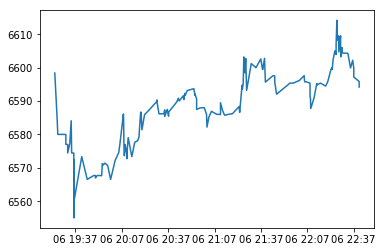

In [59]:
#should match with https://cryptowat.ch/markets/gemini/btc/usd
plt.plot(tradeTimes, tradePrc)

In [60]:
eventTimes = []

#bid, center, ask
eventPrc = []

#assume price points are in cent granularity
#bid, ask
curOB = [[0] * (100 * PRICE_MAX + 1), [0] * (100 * PRICE_MAX + 1)]

maxPrice = 0
maxBid = 0
minAsk = PRICE_MAX

for event in events:
    if event[2] * 100 - round(event[2] * 100) >= PRICE_POINT_EPS:
        print("Price point diff:", event[2], event[2] * 100 - round(event[2] * 100))
        continue
    if event[2] > maxPrice:
        maxPrice = event[2]

    pp = round(event[2] * 100)
    ind = 0
    if event[1] == "ask":
        ind = 1
    else:
        pass
    curOB[ind][pp] = event[3]
    
    eventTimes.append(datetime.datetime.fromtimestamp(event[0]//1000))
    eventPrc.append([0, 0, 0])
    
print("Max price:", maxPrice)

TypeError: can only concatenate list (not "int") to list